# Unsupervised Machine Learning: Wholesale Customers

---

# Objective

In this report, I will be analyizing a data set found for [Wholesale Customer Data](https://archive.ics.uci.edu/dataset/292/wholesale+customers) in which the main objective is to find different customer groups for marketing recommendation, coupon sending, etc. I will run multiple clustering models in order to find out how many groups we can make, as well as which model provides the best group selection.


The following are the features of the dataset:

1.	FRESH: annual spending (m.u.) on fresh products (Continuous)
2.	MILK: annual spending (m.u.) on milk products (Continuous)
3.	GROCERY: annual spending (m.u.)on grocery products (Continuous)
4.	FROZEN: annual spending (m.u.)on frozen products (Continuous)
5.	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
6.	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7.	CHANNEL: customers Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8.	REGION: customers Region - Lisnon, Oporto or Other (Nominal)

---

# Importing Libraries

In [89]:
import random

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import MeanShift, KMeans, DBSCAN, AgglomerativeClustering, estimate_bandwidth
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings('ignore')

---

# About the Data

In [90]:
df = pd.read_csv("Wholesale customers data 2.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


We are going to drop the `Channel` and `Region` columns of the dataset, as they will be of no importance for us

In [91]:
df.drop(columns=['Channel', 'Region'], inplace = True)

In [92]:
print(f'The amount of rows in the dataset: {df.shape[0]} \nThe amount of features in the dataset: {df.shape[1]}')
print()
print(f'The amount of null values: {df.isnull().sum().sum()}')
print()
print(f'The column names of the dataframe: {df.columns.tolist()}')

The amount of rows in the dataset: 440 
The amount of features in the dataset: 6

The amount of null values: 0

The column names of the dataframe: ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [94]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [95]:
print(df.rank(axis = 0, pct=True))

        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0    0.663636  0.838636  0.650000  0.075000          0.681818    0.629545
1    0.440909  0.847727  0.718182  0.545455          0.704545    0.740909
2    0.415909  0.820455  0.659091  0.636364          0.722727    0.988636
3    0.677273  0.187500  0.465909  0.879545          0.406818    0.747727
4    0.856818  0.647727  0.636364  0.775000          0.629545    0.968182
..        ...       ...       ...       ...               ...         ...
435  0.918182  0.897727  0.875000  0.968182          0.167045    0.820455
436  0.959091  0.229545  0.045455  0.809091          0.092045    0.836364
437  0.702273  0.936364  0.975000  0.163636          0.972727    0.765909
438  0.575000  0.322727  0.268182  0.375000          0.150000    0.800000
439  0.215909  0.272727  0.313636  0.020455          0.395455    0.038636

[440 rows x 6 columns]


In [96]:
# Choosing 10 random indices to create a visualization
rand_index = random.sample(range(0,444), 10)
rand_data = df.iloc[rand_index]
rand_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
416,4389,10940,10908,848,6728,993
255,31614,489,1495,3242,111,615
178,11002,7075,4945,1152,120,395
380,28257,944,2146,3881,600,270
339,2617,1188,5332,9584,573,1942
229,8656,2746,2501,6845,694,980
230,11072,5989,5615,8321,955,2137
419,8861,3783,2223,633,1580,1521
197,2427,7097,10391,1127,4314,1468
156,3830,5291,14855,317,6694,3182


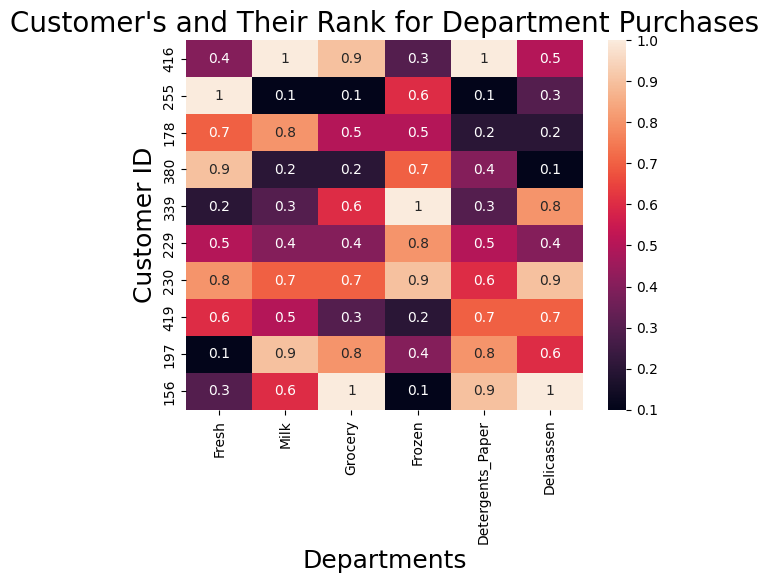

In [97]:
sns.heatmap(rand_data.rank(pct=True, axis=0), annot=True)
plt.title("Customer's and Their Rank for Department Purchases",size=20)
plt.ylabel("Customer ID",size=18)
plt.xlabel("Departments", size = 18)
plt.show()

Here, we can take a look at a random sample from our dataset. The information shown is the percentile in which the customer resides with respect to spending money in a department annually. For example, Customer 127 is a top spender in the Fresh Produce department. In our analysis, we are hopefully going to be able to find a way to group customers in which we can specialize promotions for them. This is a great representation on how the grouping may occur.

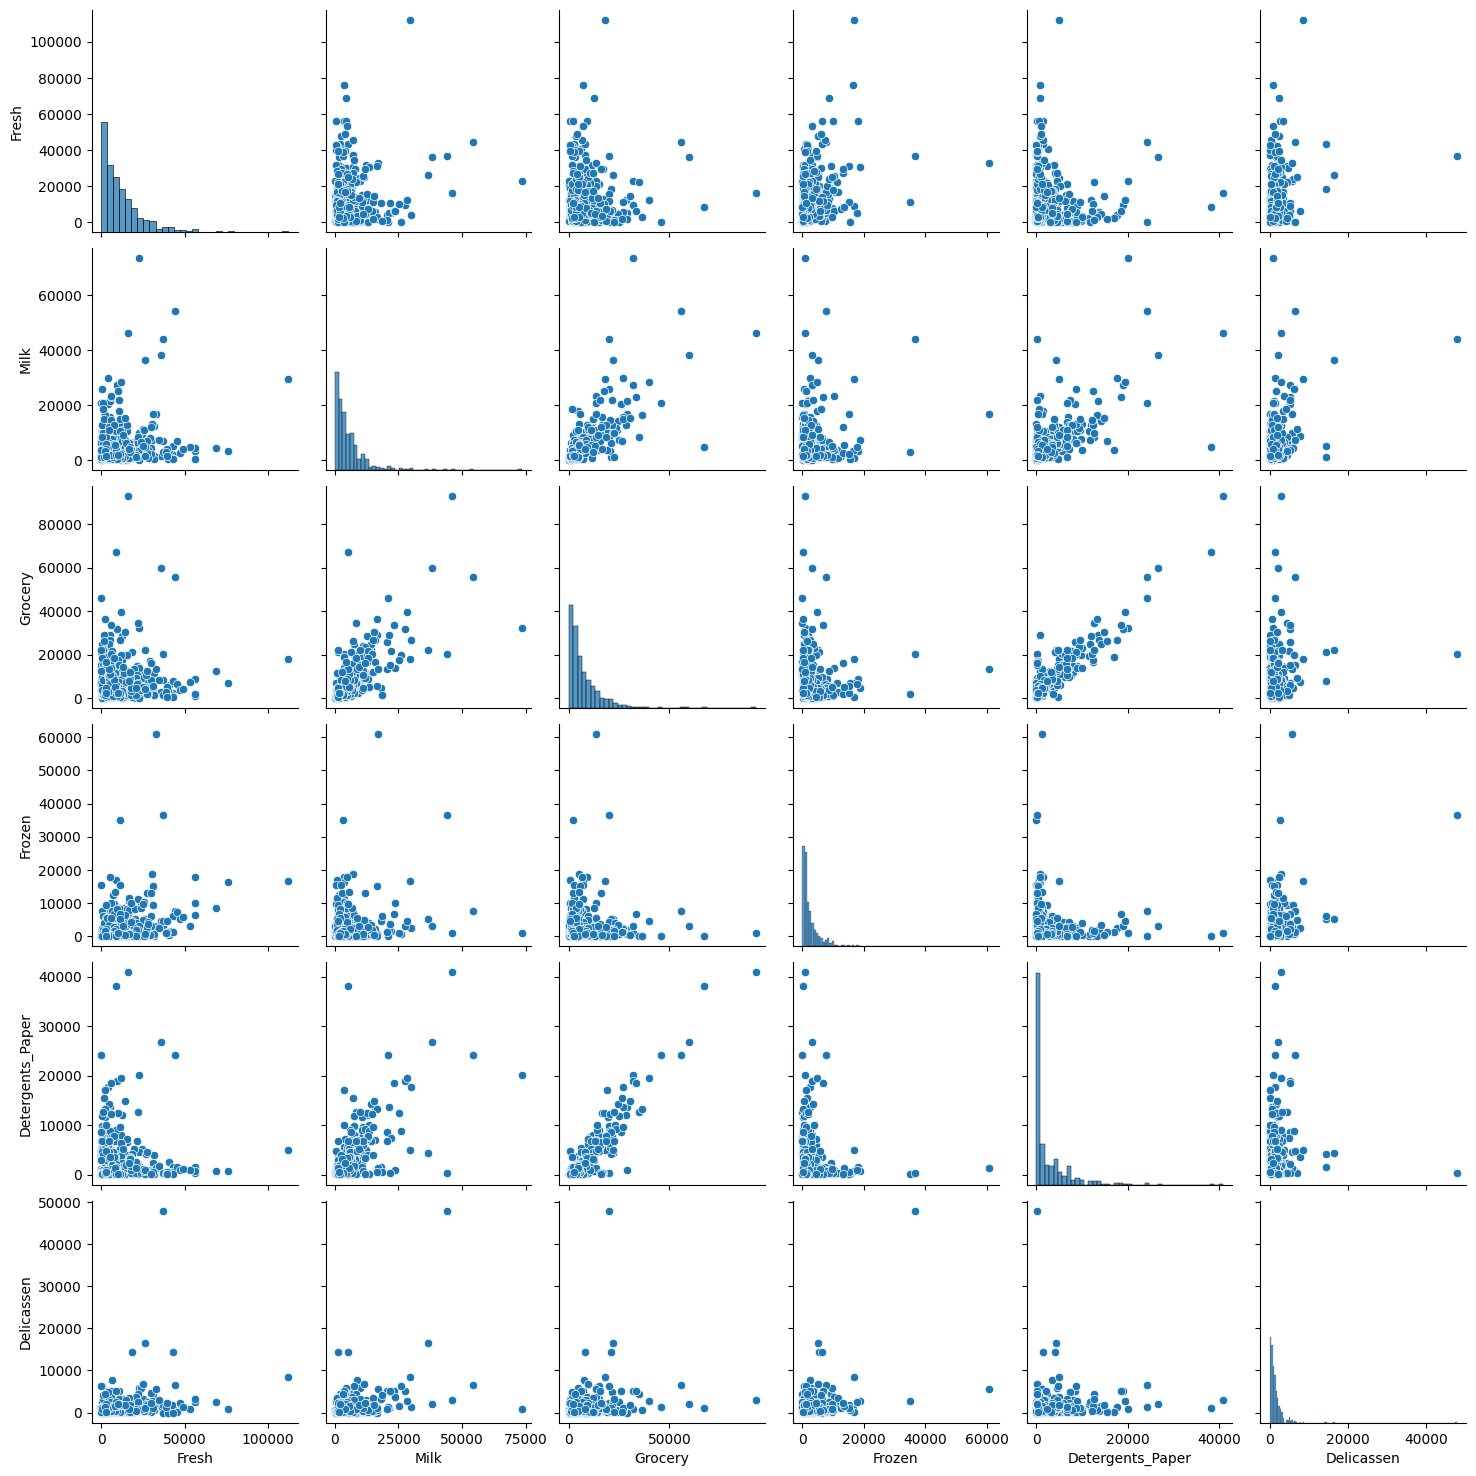

In [98]:
sns.pairplot(df)

In this diagram, we can also see that there are some correlations. For instance, if we look at the pairplot of Grocery and Detergents_Paper, we can see a clear positive trend. There could be some underlying bias in this group, as the cateogory might have some data leakage since grocery is a broad cateogory. Nevertheless, an interesting find.

----

# Modeling

In this section, we are going to look at different modeling approaches that we can take to find clusters in the dataset. After we find a model we would like to approach, we are going to try and tune the parameters to optimize it.

---
## MeanShift

We are going to start with MeanShift as we do not need to pass any clusters, and we can use the amount that the algorithm found as guidance with the others. Also, this data only has 440 rows, so the algorithm should not be slow. 

In [99]:
X = df.to_numpy()
bandwidth = estimate_bandwidth(X)
print(f'Bandwidth: {bandwidth}')
ms = MeanShift(bandwidth = bandwidth)

Bandwidth: 14662.121478351812


In [100]:
ms.fit(X)
print('There are {} clusters'.format(len(np.unique(ms.labels_))))

There are 14 clusters


In [101]:
pred = ms.predict(X)
np.unique(pred)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

Since there are only 440 records, having 14 clusters is suspicious and leads me to believe we are susceptible to outliers. Let's convert this NumPy array into a panda's series so we can consider the value counts of each cluster. Then, we can see how many points are outliers.

In [102]:
pred_df = pd.Series(pred)
pred_df.value_counts()

0     383
9      21
13     12
1      12
7       2
11      2
3       1
5       1
10      1
8       1
2       1
4       1
6       1
12      1
Name: count, dtype: int64

Here, we can notice that this dataset has more outlier's than normal. There are two approaches to this, we could either move to DBSCAN, or we could remove/disregard those values that have their own cluster and proceed with further analysis. We will remove these outliers and proceed with visualization. After, we will also explore different models.

In [103]:
def remove_outlier(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    
    # Determine outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    for i in data.index:
        value=data.loc[i,column]
        if(value>upper_bound):
            data.loc[i,column]=upper_bound
        elif(value<lower_bound):
            data.loc[i,column]=lower_bound

In [104]:
df_scaled = df.copy()

for column in df_scaled.columns.tolist():
    remove_outlier(df_scaled, column)

X_scaled = df_scaled.to_numpy()

In [105]:
bandwidth_scaled = estimate_bandwidth(X_scaled)
print(f'Bandwidth: {bandwidth_scaled}')


Bandwidth: 12225.984777655365


In [106]:
ms_scaled = MeanShift(bandwidth = bandwidth_scaled)
ms_scaled.fit(X_scaled)

MeanShift(bandwidth=12225.984777655365)

In [107]:
ms_scaled_df = df_scaled.copy()
ms_scaled_df['Cluster'] = ms_scaled.predict(X_scaled)
ms_scaled_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669.00,9656.0,7561.000,214.00,2674.000,1338.00,0
1,7057.00,9810.0,9568.000,1762.00,3293.000,1776.00,0
2,6353.00,8808.0,7684.000,2405.00,3516.000,3938.25,0
3,13265.00,1196.0,4221.000,6404.00,507.000,1788.00,0
4,22615.00,5410.0,7198.000,3915.00,1777.000,3938.25,0
...,...,...,...,...,...,...,...
435,29703.00,12051.0,16027.000,7772.25,182.000,2204.00,0
436,37642.75,1431.0,764.000,4510.00,93.000,2346.00,0
437,14531.00,15488.0,23409.875,437.00,9419.875,1867.00,0
438,10290.00,1981.0,2232.000,1038.00,168.000,2125.00,0


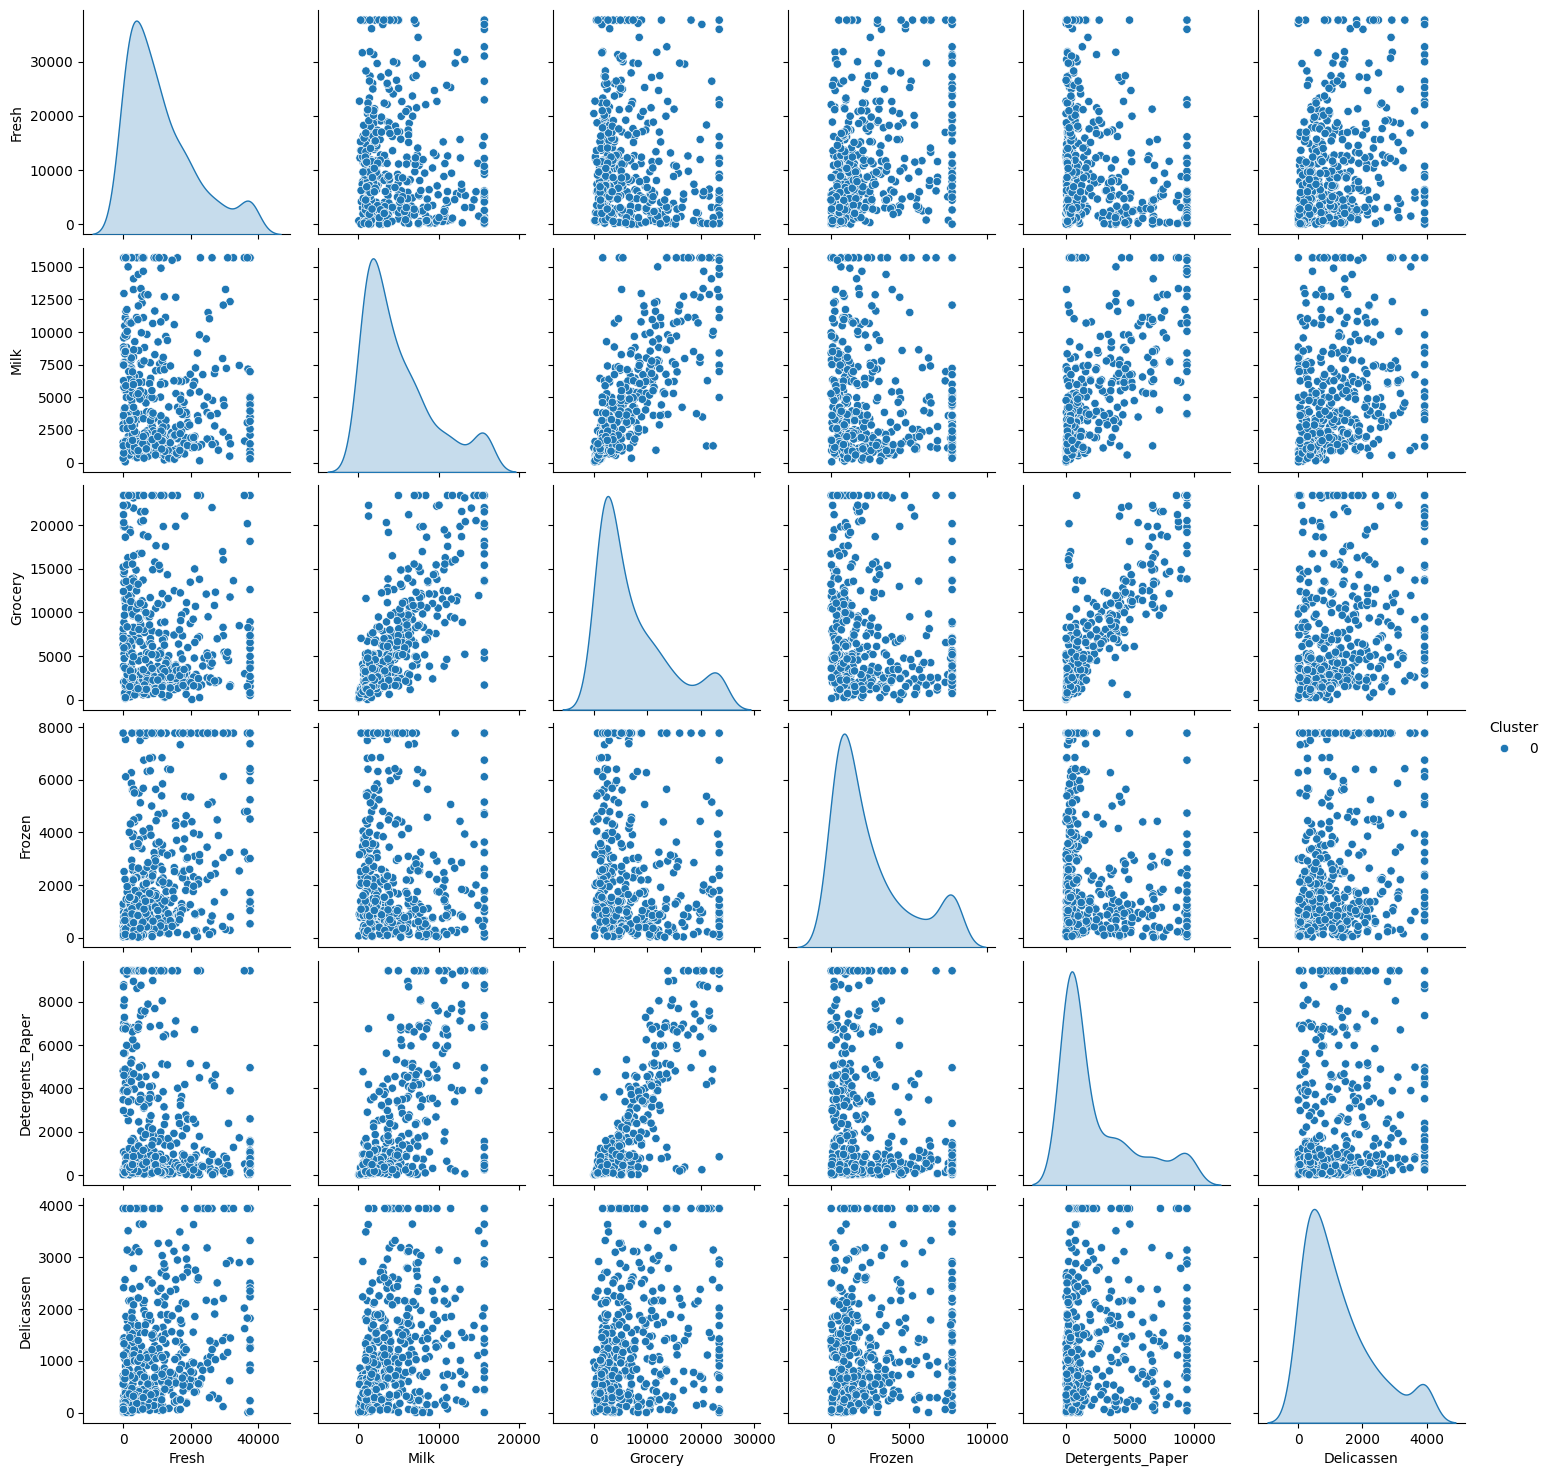

In [108]:
sns.pairplot(ms_df, hue='Cluster', palette = sns.color_palette())
plt.show()

As we can see, when we scale the data, the Mean-Shift algorithm is not successful as it only creates one cluster. We need to move on and try another algorithm.

---
## DBSCAN

First, we need to find the right epsilon. To do so, we are going to look at the elbow point of the NearestNeighbor distances. This can give us a ball park.

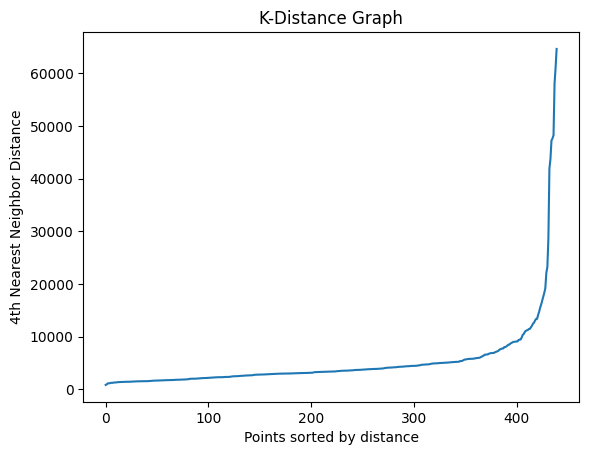

In [109]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:, 4], axis=0)

plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()

As we can see, the elbow point is around 7000. This will be the epsilon we are going to choose. For the min_samples, we will start with the original amount of features we have

In [110]:
db = DBSCAN(eps = 7000,min_samples=8)
db.fit(X)
preds = db.labels_
np.unique(preds)

array([-1,  0])

As we can see, we only have one cluster and the rest is noise. Lets loop through different values for min_samples to see what can change.

In [111]:
for i in range(6,15):
    db = DBSCAN(eps = 7000,min_samples=i)
    db.fit(X)
    preds = db.labels_
    print(f'For i = {i}:', np.unique(preds))

For i = 6: [-1  0]
For i = 7: [-1  0]
For i = 8: [-1  0]
For i = 9: [-1  0]
For i = 10: [-1  0  1]
For i = 11: [-1  0  1]
For i = 12: [-1  0]
For i = 13: [-1  0]
For i = 14: [-1  0]


Judging base off of our values from MeanShift, a min_samples value of 10 or 11 would be the most explainable. Let's look at the value count for when min_samples is 10.

In [112]:
db = DBSCAN(eps = 7000, min_samples = 11)
db.fit(X)
preds = db.labels_

pred_df = pd.Series(preds)
pred_df.value_counts()

 0    374
-1     55
 1     11
Name: count, dtype: int64

As we can see, the clusters using DBSCAN is not too reliable. Let us look at KMeans, since we have a ballpark of how many clusters we should look out for.

---
## KMeans


Judging off of our results from Mean-Shift, `n_clusters` would be beneficial to be either 3 or 4. Let's confirm this through the elbow method.

Text(0, 0.5, 'Inertia')

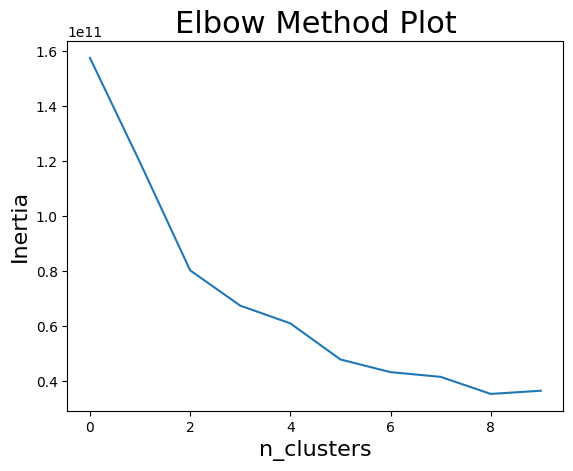

In [113]:
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(inertia)
plt.title("Elbow Method Plot",size=22)
plt.xlabel("n_clusters",size=16)
plt.ylabel("Inertia",size=16)

We can see that the elbow method plot does confirm the number of clusters should be arround 4. Let us solidify our model and then we can do visualization on it.

In [116]:
km = KMeans(n_clusters=4, random_state=3)
km_df = df.copy()
km_df['Cluster'] = km.fit_predict(X)
km.

6

We are going to look at the same pairplot, but we will add in the clusters as the hue.

In [ ]:
sns.pairplot(km_df, hue='Cluster', palette = sns.color_palette('hls', 4))
plt.suptitle("KMeans PairPlot", y =1.02,fontsize=18)
plt.show()

In [ ]:
# For the scaled data.
km_scaled_df = df_scaled.copy()
km_scaled = KMeans(n_clusters=4, random_state=3)
km_scaled.fit(X_scaled)
km_pred_scaled = km_scaled.predict(X)

km_scaled_df['Cluster'] = km_pred_scaled
sns.pairplot(km_scaled_df, hue='Cluster', palette = sns.color_palette('hls', 4))
plt.suptitle("KMeans PairPlot", y =1.02,fontsize=18)
plt.show()

---

# Results

As we could see, from our analysis, K-Means was the best clustering algorithm to use. It was able to efficiently determine clusters, and we were able to find the amount of clusters needed using the `elbow method`. DBSCAN was not able to find efficient clusters. This could be because the shape of the data in higher dimensions was weirdly shaped, and DBSCAN does not run well on that. Mean-Shift helped us understand that there are outliers present, as well as the amount of clusters that we should be looking out for. However, when removing those outliers, the algorithm performed poorly, in which we had to move to another algorithm.

The possible flaws in this data is that:
1. There are a good amount of outliers. We removed these outliers, however, they could have held some important information regarding how we should view our customers. Further exploration should be considered on these outliers.
2. The dataset was small. For us to be able to build a model with confident clustering, we should have more than 440 observations. Obtaining more data would be an attribute that would be needed to futher this model.
3. Having more features could also help group clusters to increase our confidences of groupings.

Looking at both of the K-Means pairplots, the grouping that the algorithm came up with is visually pleasing, as the groups look to be grouped correctly. This does __not__ mean it is correct. 